## Import Dependencies

In [1]:
# importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import pickle
%matplotlib inline

## Data

### Collection

In [2]:
# load dataset to a pandas dataframe
wine_dataset = pd.read_csv("dataset/winequality-red.csv")

### Analysis

In [3]:
# view the contents of dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [121]:
# shape of the dataset
wine_dataset.shape

(1599, 12)

In [122]:
# check for any missing value
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Inference: There are no missing values in the dataset**

In [123]:
# basic info of the dataset
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [124]:
# statistical measures of dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [125]:
# unique elements in the dataset
wine_dataset.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [126]:
# check for duplicate rows
wine_dataset.duplicated().sum()

240

**Inference: 240 duplicate rows were observed.**

In [127]:
# removing duplicate rows
wine_dataset.drop_duplicates(keep='first', inplace=True)

In [128]:
# # check for duplicate rows
wine_dataset.duplicated().sum()

0

In [129]:
# shape of the dataset
wine_dataset.shape

(1359, 12)

### Explore with Visuals

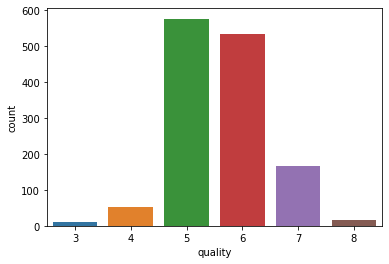

In [130]:
# type of quality available

sns.countplot(x='quality', data=wine_dataset)
plt.show()

**Inference: There are 6 types of qualities and majority of wines lie between 5 and 6**

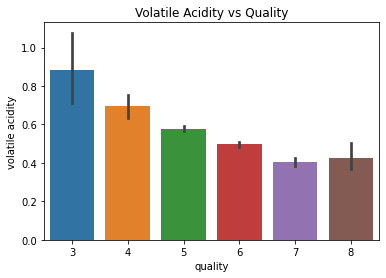

In [131]:
# volatile acidity vs Quality
sns.barplot(x="quality", y="volatile acidity", data=wine_dataset)
plt.title("Volatile Acidity vs Quality")
plt.show()

**Inference: Lower the volatile acidity, better will be the rating**

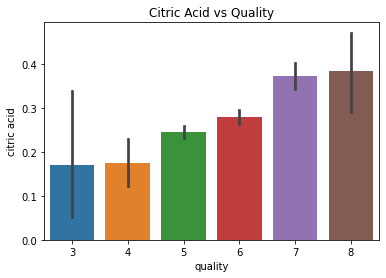

In [132]:
# citric acid vs Quality
sns.barplot(x="quality", y="citric acid", data=wine_dataset)
plt.title("Citric Acid vs Quality")
plt.show()

**Inference: Higher the citric acid, better will be the rating**

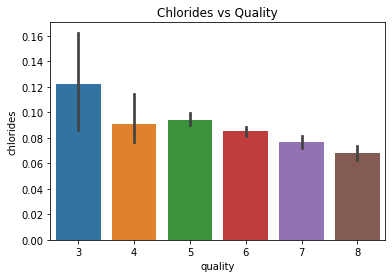

In [133]:
# Chlorides vs Quality
sns.barplot(x="quality", y="chlorides", data=wine_dataset)
plt.title("Chlorides vs Quality")
plt.show()

**Inference: Lower the chlorides, better will be the rating**

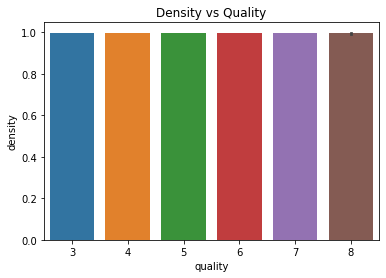

In [134]:
# Density vs Quality
sns.barplot(x="quality", y="density", data=wine_dataset)
plt.title("Density vs Quality")
plt.show()

**Inference: Density does not have any effect on the quality.**

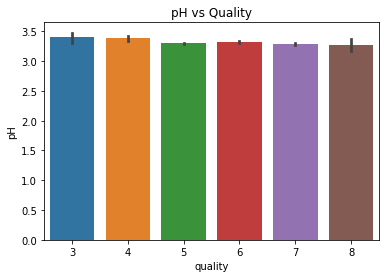

In [135]:
# pH vs Quality
sns.barplot(x="quality", y="pH", data=wine_dataset)
plt.title("pH vs Quality")
plt.show()

**Inference: pH does not effect much on the quality but lower pH results in better quality.**

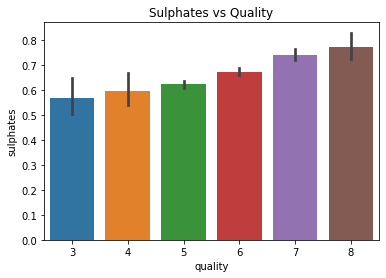

In [136]:
# Sulphates vs Quality
sns.barplot(x="quality", y="sulphates", data=wine_dataset)
plt.title("Sulphates vs Quality")
plt.show()

**Inference: Higher the content of Sulphates, higher the rating.**

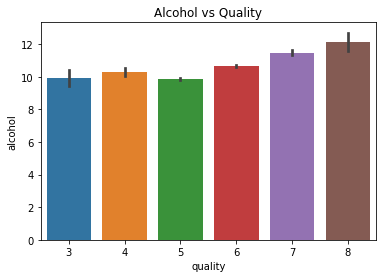

In [137]:
# Alcohol vs Quality
sns.barplot(x="quality", y="alcohol", data=wine_dataset)
plt.title("Alcohol vs Quality")
plt.show()

**Inference: Higher the content of alcohol, higher the rating.**

In [138]:
# correlation

correlation = wine_dataset.corr()

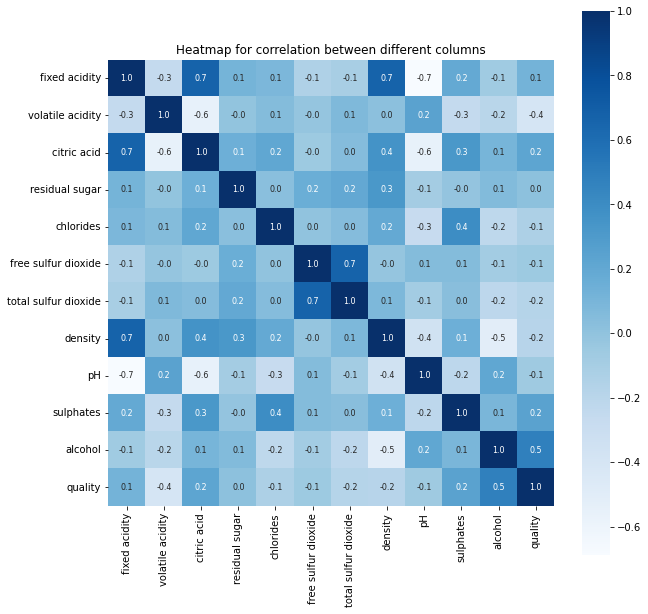

In [139]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title("Heatmap for correlation between different columns")
plt.show()

### Preprocessing

In [140]:
# Splitting features and target

X = wine_dataset.drop(columns="quality", axis = 1)

# Label Binarization

Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

## Model

### Splitting data to training and testing

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [142]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape,)

(1359, 11) (951, 11) (408, 11)
(1359,) (951,) (408,)


### Model Training (Random Forest Classifier)

In [143]:
classifier = RandomForestClassifier()

In [144]:
# training the model
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [145]:
# predictions for training data
training_predictions = classifier.predict(X_train)

In [146]:
# predictions for test data
test_predictions = classifier.predict(X_test)

### Evaluation

In [147]:
print(f"Training data accuracy : {accuracy_score(Y_train, training_predictions)}")
print(f"Test data accuracy : {accuracy_score(Y_test, test_predictions)}")

Training data accuracy : 1.0
Test data accuracy : 0.8872549019607843


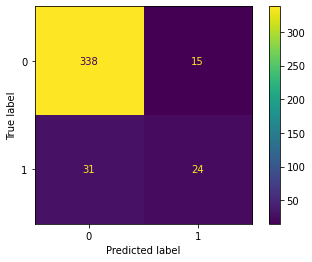

In [151]:
# confusion matrix

cf_matrix = confusion_matrix(Y_test, test_predictions)
cm_display = ConfusionMatrixDisplay(cf_matrix).plot()

In [154]:
# precision
precision = precision_score(Y_test, test_predictions)
print(f"The precision is : {precision}")

The precision is : 0.6153846153846154


In [153]:
# recall
recall = recall_score(Y_test, test_predictions)
print(f"The recall is : {recall}")

0.43636363636363634


### Saving the model

In [ ]:
model_filname = "saved_model/wine_trained_model.sav"
pickle.dump(classifier, open(model_filname,'wb'))